In [264]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [281]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0027_019_02.png',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0020_016_03.png',cv2.IMREAD_GRAYSCALE)

In [282]:
img.shape

(256, 4096)

In [283]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 32
    ksize = 16  # The local area to evaluate
    sigma = 2. #3.0  # Larger Values produce more edges
    lambd = 20. #10.0
    gamma = 2. #0.5
    psi = 0.  # Offset value - lower generates cleaner results
    for theta in np.linspace(0, np.pi, num_filters, endpoint=False):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [284]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

In [285]:
gfilters = create_gaborfilter()
# img = cv2.GaussianBlur(img,(11,11),0)
image_g = apply_filter(img, gfilters)

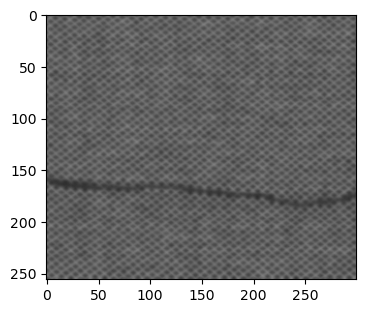

In [287]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
# plt.imshow(image_g[:,2000-256:2000], cmap="gray",vmin=0, vmax=255)
plt.imshow(image_g[:,1200:1500], cmap="gray",vmin=0, vmax=255)

plt.show()


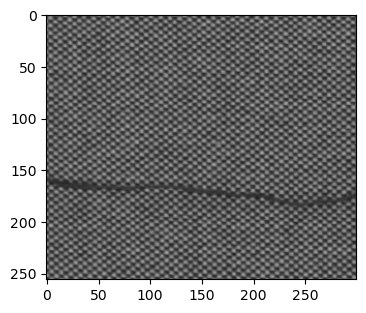

In [289]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(img[:,1200:1500], cmap="gray",vmin=0, vmax=255)
plt.show()

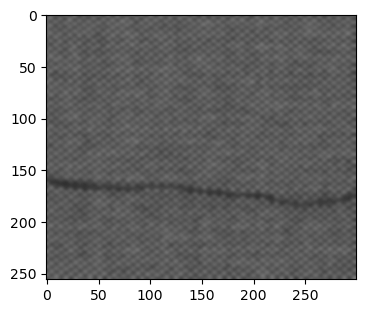

In [291]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(cv2.GaussianBlur(img[:,1200:1500],(9,9),0), cmap="gray",vmin=0, vmax=255)
plt.show()

In [317]:
min_interval = 120
max_interval = 180
image_edge_g = cv2.Canny(image_g,threshold1 = min_interval,threshold2 = max_interval)#,apertureSize = 5)

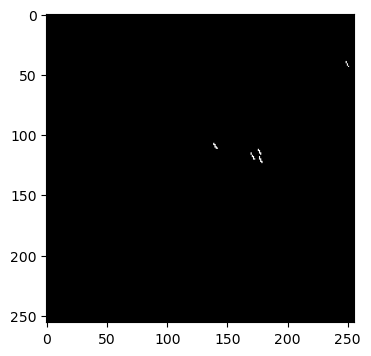

In [318]:
plt.figure(figsize=(4, 4))
plt.imshow(image_edge_g[:,2000-256:2000], cmap="gray")
plt.show()

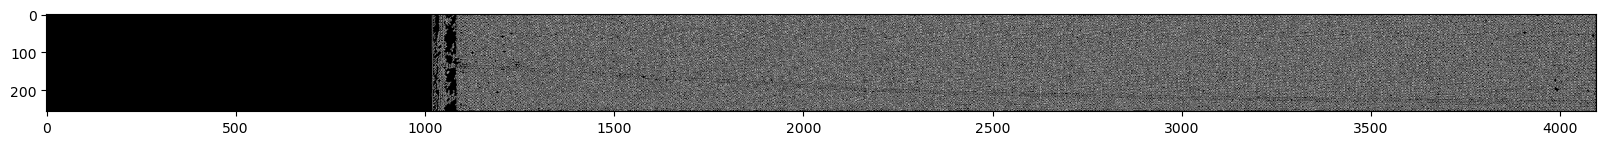

In [278]:
plt.figure(figsize=(20, 8))
plt.imshow(image_edge_g, cmap="gray")
plt.show()

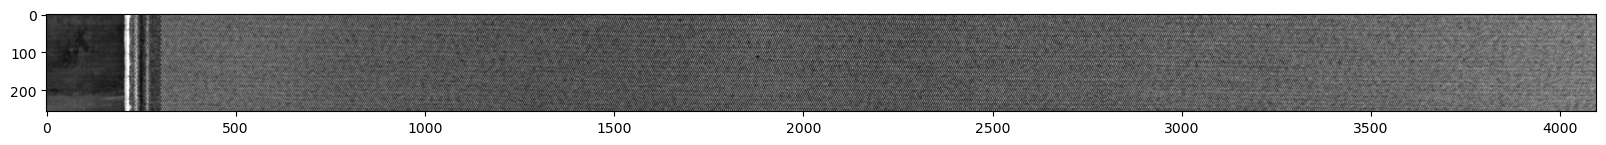

In [227]:
plt.figure(figsize=(20, 8))
plt.imshow(img, cmap="gray")
plt.show()

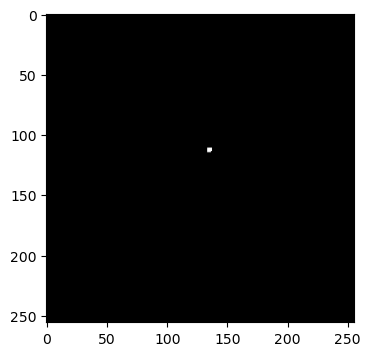

In [319]:
maksimg = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0027_019_02_mask.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(maksimg[:,2000-256:2000], cmap="gray")
plt.show()

In [174]:
np.amax(maksimg)

0

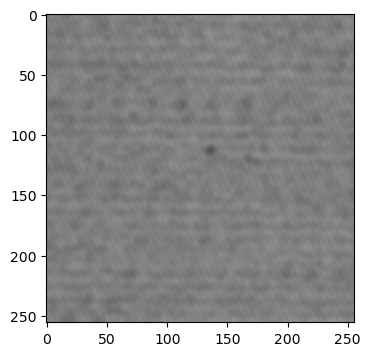

In [144]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(image_g[:,2000-256:2000], cmap="gray",vmin=0, vmax=255)
plt.show()

In [7]:
def sliding_window(image, sq_size = 32, pix_steps=4):
    img_list = []
    for i in np.arange(0,image.shape[0]-sq_size+pix_steps,pix_steps):
        for j in np.arange(0,image.shape[1]-sq_size+pix_steps,pix_steps):
            img_list.append(image[i:i+sq_size,j:j+sq_size].flatten())
    return np.array(img_list)

In [8]:
img_list = sliding_window(image_g)
print(img_list.shape)
norm_img_list = img_list -np.sum(img_list,axis=0)
norm_img_list = norm_img_list/np.sqrt(np.mean(norm_img_list**2))
# norm_img_list = norm_img_list.reshape(960,256**2)
print(norm_img_list.shape)


NameError: name 'image_g' is not defined

In [12]:
pca = PCA(n_components=80)
pca.fit(norm_img_list)
comp = pca.components_

In [24]:
vectors = pca.transform(norm_img_list)

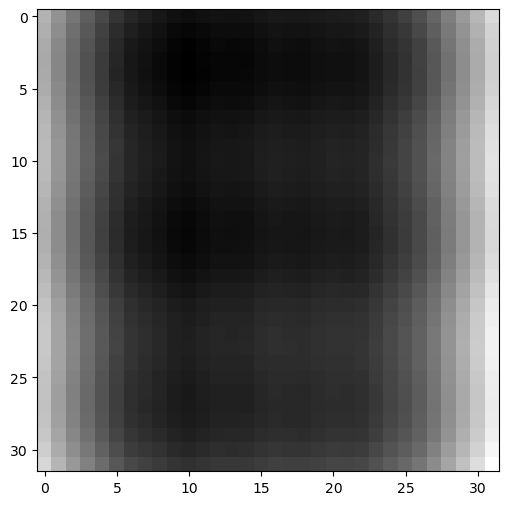

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(comp[0,:].reshape(32,32),cmap="gray")
plt.show()

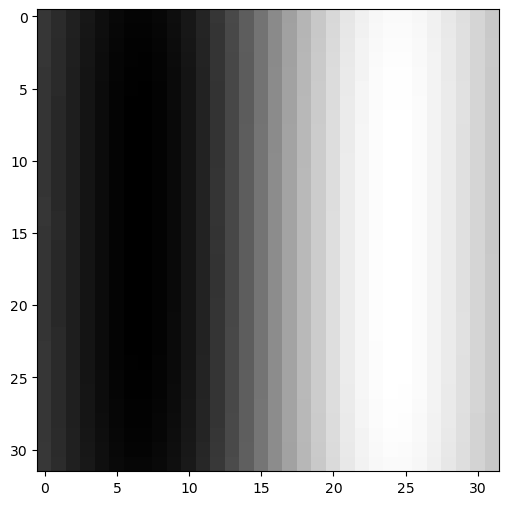

In [108]:
plt.figure(figsize=(6,6))
plt.imshow(comp[1,:].reshape(32,32),cmap="gray")
plt.show()

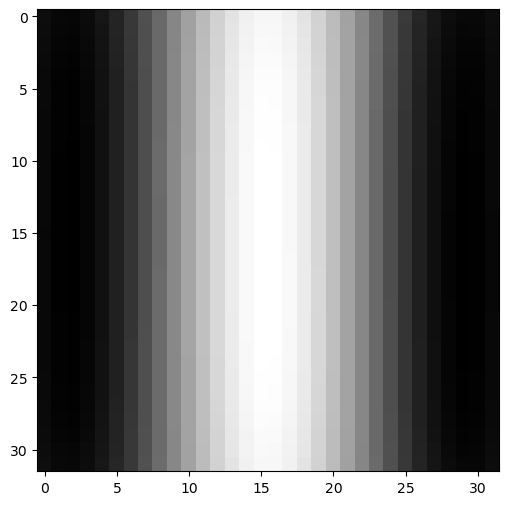

In [109]:
plt.figure(figsize=(6,6))
plt.imshow(comp[2,:].reshape(32,32),cmap="gray")
plt.show()

In [14]:
from sklearn import svm


In [26]:
mask_im = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0027_019_02_mask.png',cv2.IMREAD_GRAYSCALE)

mask_list = sliding_window(mask_im)

y = np.zeros(img_list.shape[0])
for el in range(mask_list.shape[0]):
    if np.amax(mask_list[el])>0:
        y[el]=1.
    else:
        y[el]=-1.

In [46]:
# y = y.reshape(-1, 1)
clf = svm.SVC(kernel='linear', tol=1e-9)
clf.fit(vectors, y)


SVC(kernel='linear', tol=1e-09)

In [47]:
from sklearn import metrics

y_pred = clf.predict(vectors)
print("Accuracy:",metrics.accuracy_score(y, y_pred))



Accuracy: 0.9986027014438752


In [35]:
1- (81/y.shape[0])

0.9986027014438752

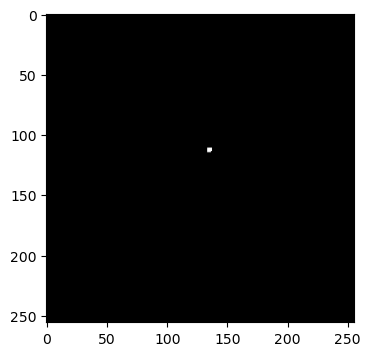

In [154]:
plt.figure(figsize=(4,4))
plt.imshow(maksimg[:,2000-256:2000], cmap="gray")
plt.show()

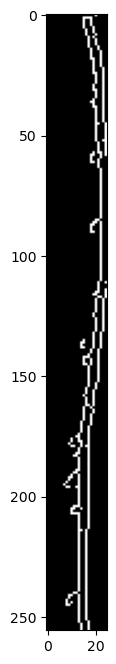

In [40]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0069_023_02_mask.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 8))
min_interval = 500
max_interval = 560
image_edge_g = cv2.Canny(img,threshold1 = min_interval,threshold2 = max_interval,apertureSize = 5)
plt.imshow(image_edge_g[:,3675:3700], cmap="gray")
plt.show()

## Wavelet

In [240]:
import pywt

In [292]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0020_016_03.png',cv2.IMREAD_GRAYSCALE)
mask =  cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0020_016_03_mask.png',cv2.IMREAD_GRAYSCALE)
blur_img = cv2.GaussianBlur(img,(11,11),0)

In [241]:
blur_img = cv2.GaussianBlur(img,(11,11),0)

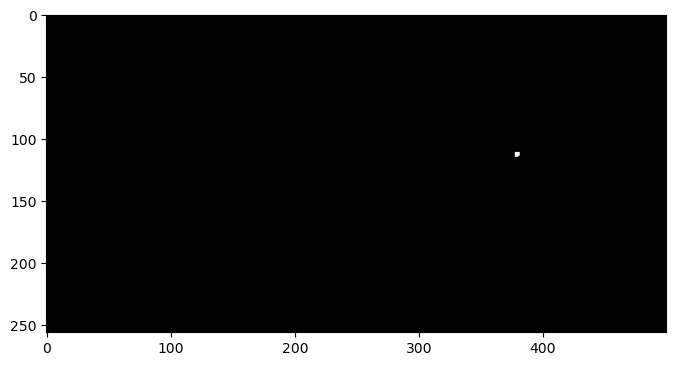

In [154]:
plt.figure(figsize=(8, 8))
plt.imshow(mask[:,1500:2000], cmap="gray")
plt.show()

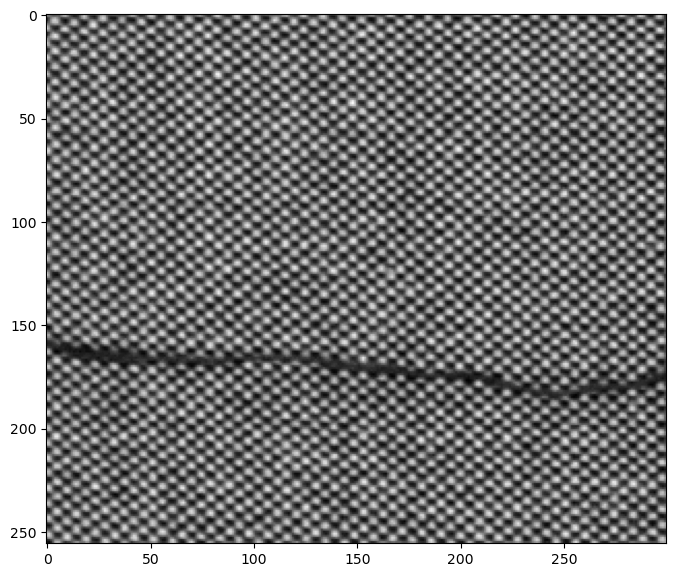

In [294]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:,1200:1500], cmap="gray")
plt.show()

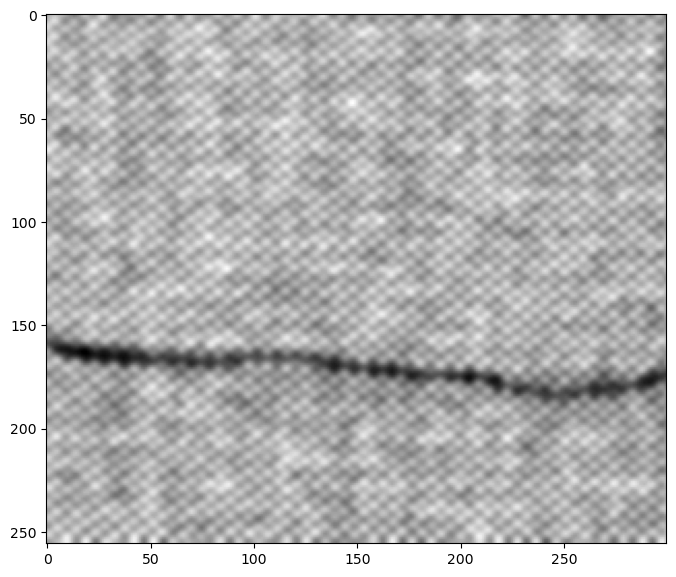

In [295]:
plt.figure(figsize=(8, 8))
plt.imshow(blur_img[:,1200:1500], cmap="gray")
plt.show()

In [12]:
def sliding_window(image, sq_size = 32, pix_steps=4):
    img_list = []
    for i in np.arange(0,image.shape[0]-sq_size+pix_steps,pix_steps):
        for j in np.arange(0,image.shape[1]-sq_size+pix_steps,pix_steps):
            img_list.append(image[i:i+sq_size,j:j+sq_size])
    return np.array(img_list)
img_list = sliding_window(img)


In [296]:
coeffs2 = pywt.dwt2(blur_img, 'db3')#_list[0,:,:], 'db3')
LL, (LH, HL, HH) = coeffs2

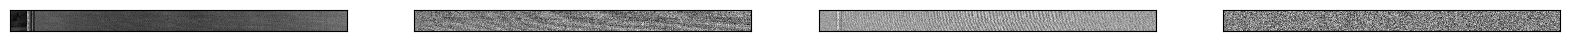

In [246]:
fig = plt.figure(figsize=(20, 10))

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    # ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])


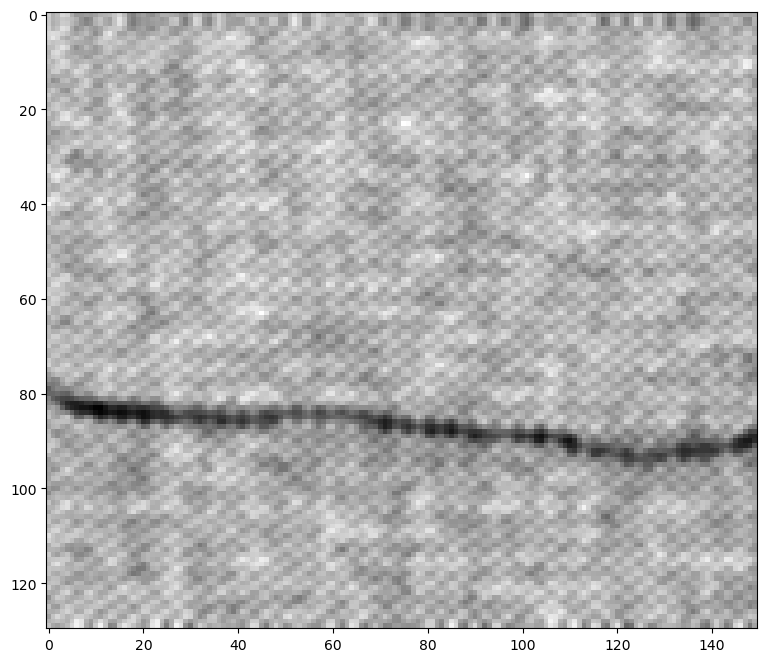

In [300]:
plt.figure(figsize=(20,8))
plt.imshow(LL[:,600:750], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

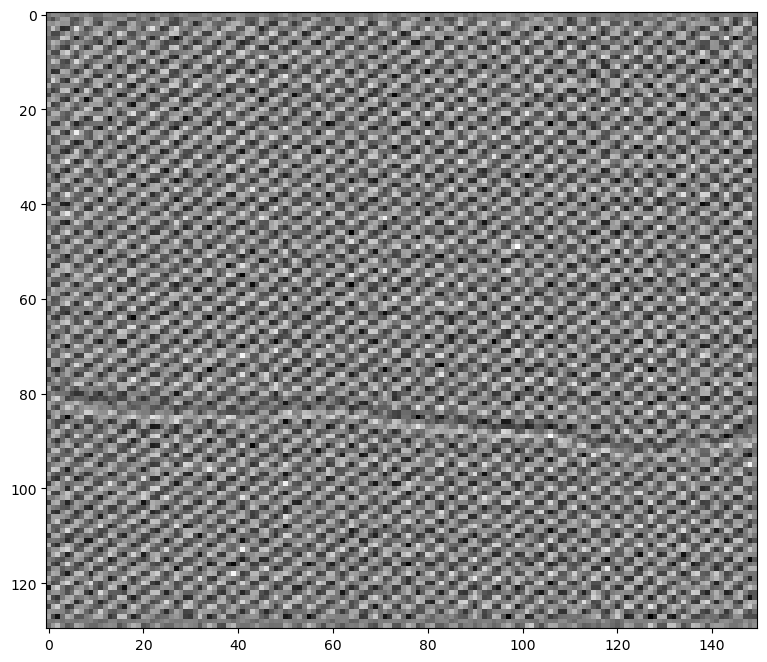

In [304]:
plt.figure(figsize=(20,8))
plt.imshow(LH[:,600:750], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

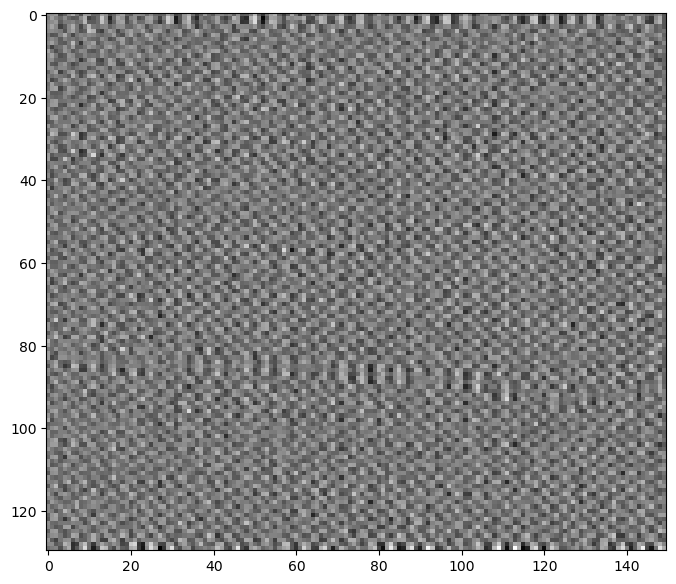

In [305]:
plt.figure(figsize=(8,8))
plt.imshow(HL[:,600:750], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

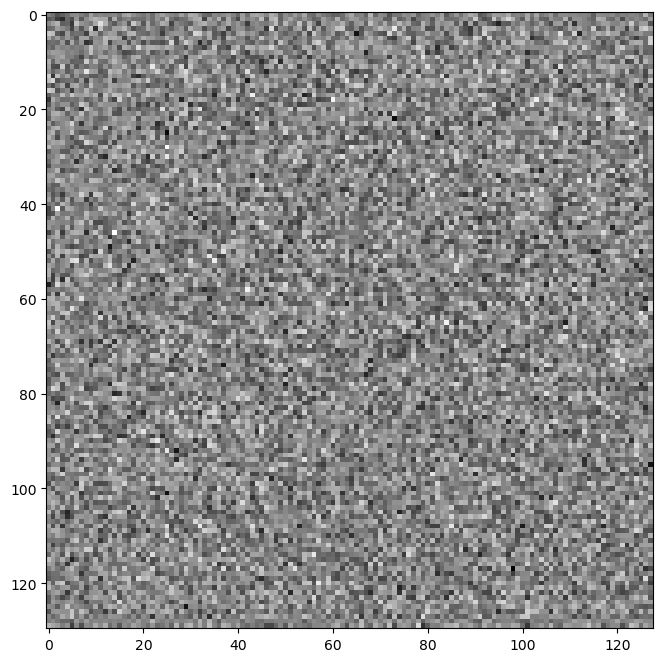

In [250]:
plt.figure(figsize=(20,8))
plt.imshow(HH[:,1000-128:1000], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [306]:
h = pywt.wavedec2(blur_img, 'db3',  level=2)

In [307]:
len(h)

3

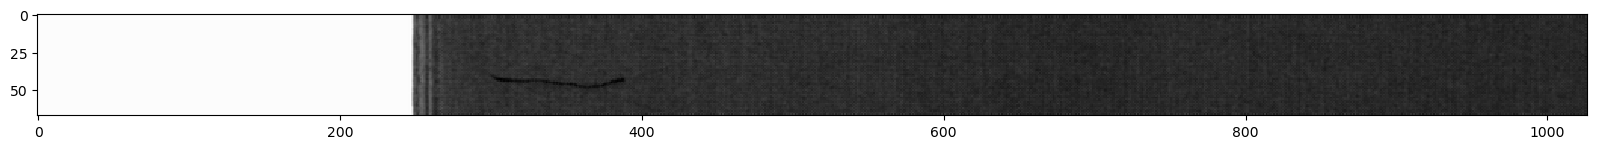

In [313]:
plt.figure(figsize=(20,8))
plt.imshow(h[0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [317]:
h[1][0].shape

(67, 1027)

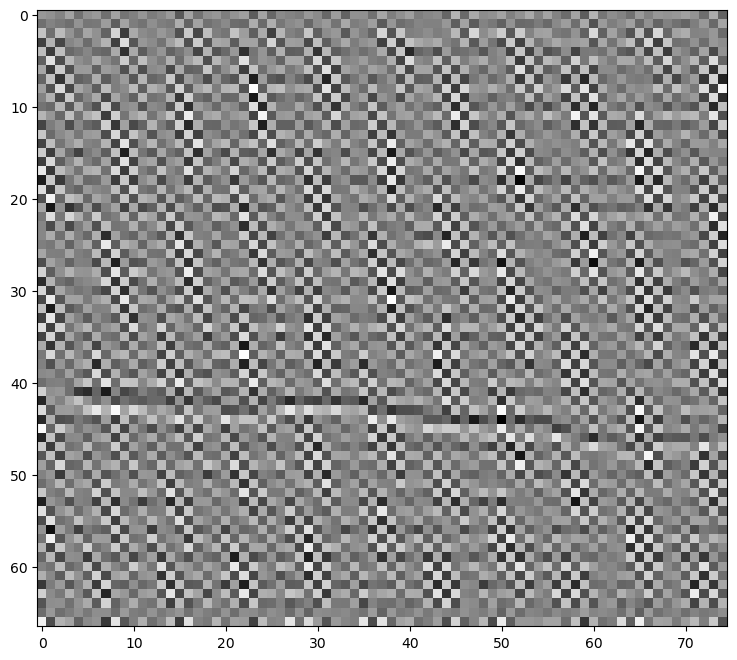

In [311]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][0][:,300:375], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

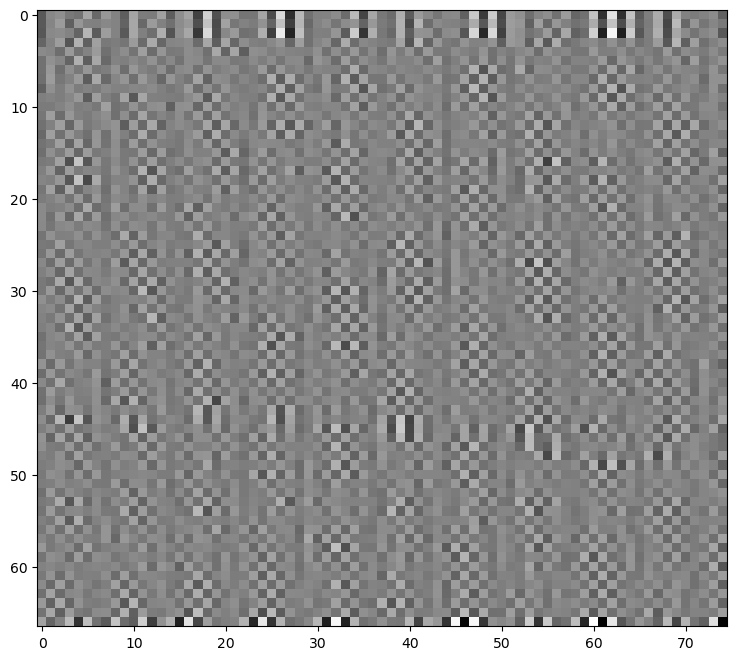

In [312]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][1][:,300:375], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

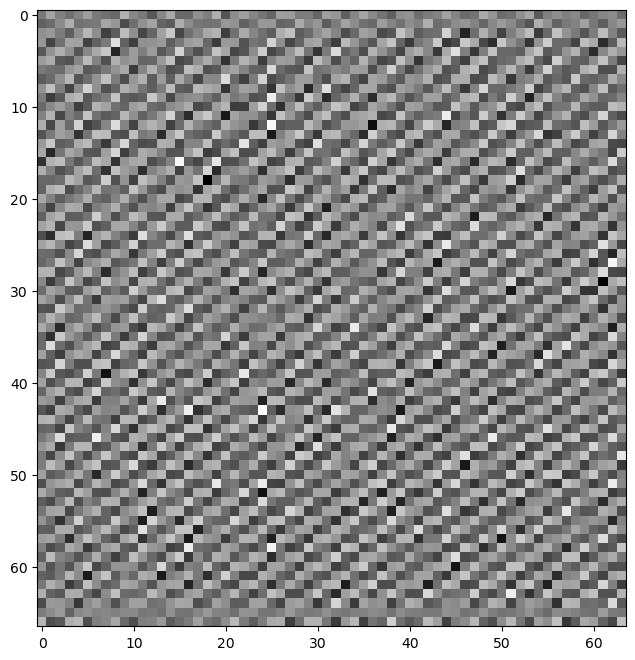

In [259]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][2][:,300:375], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

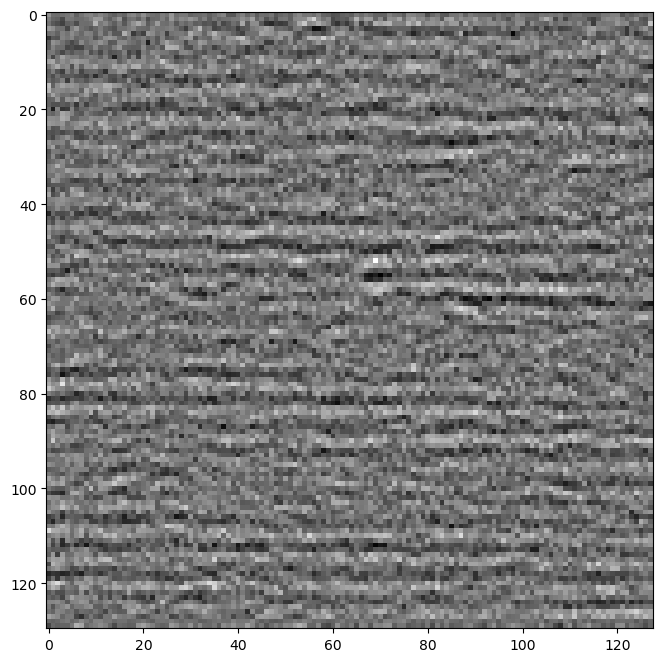

In [261]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][0][:,1000-128:1000], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

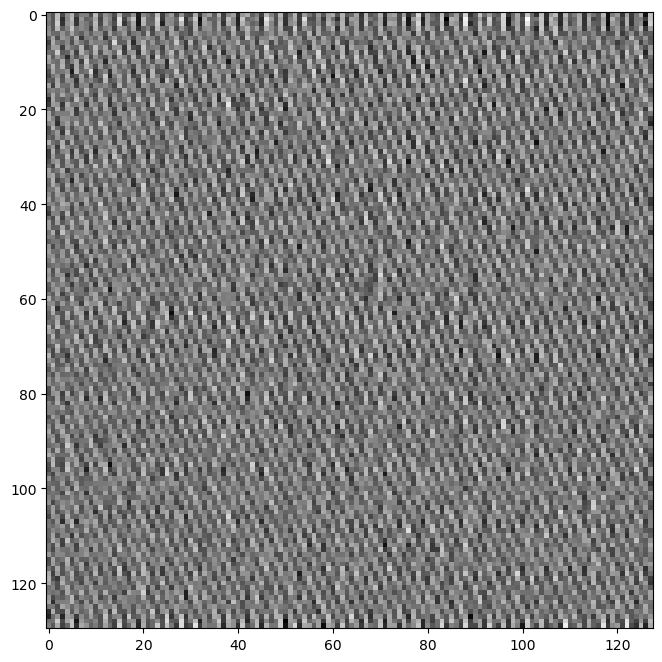

In [262]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][1][:,1000-128:1000], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

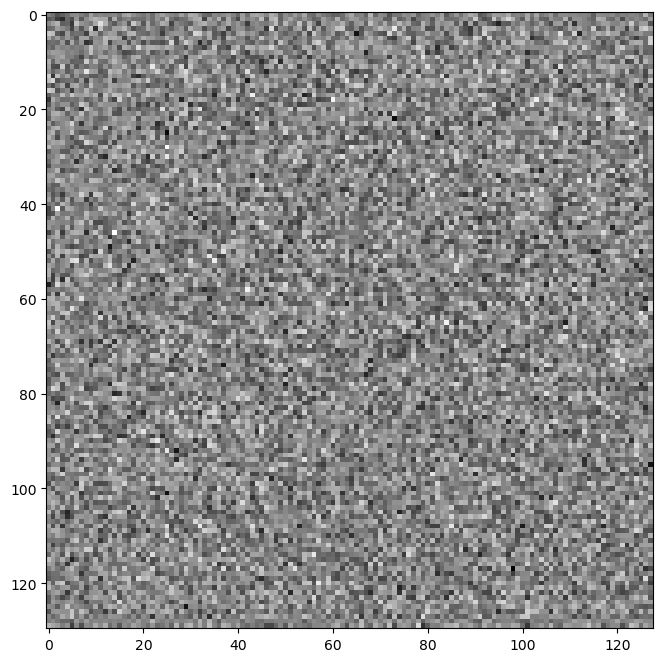

In [263]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][2][:,1000-128:1000], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

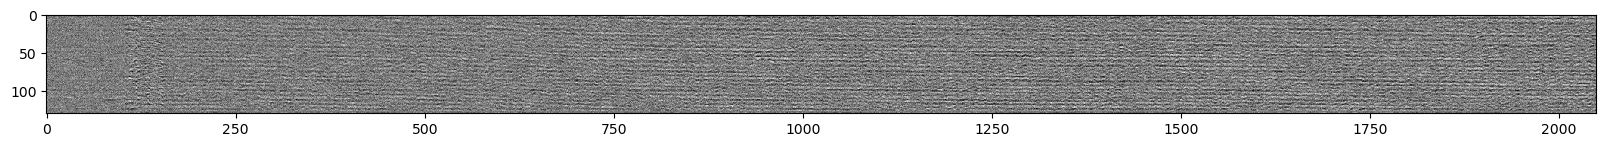

In [175]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

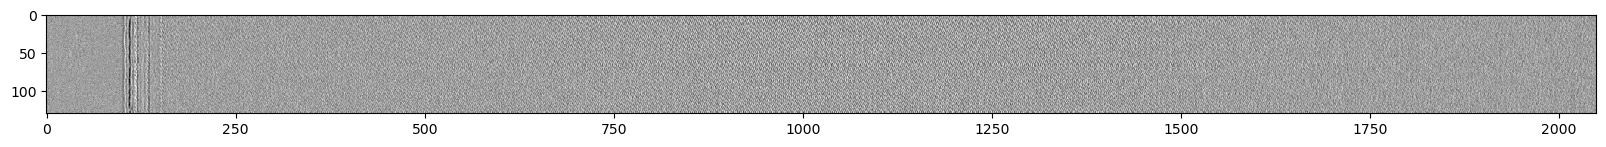

In [176]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][1], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

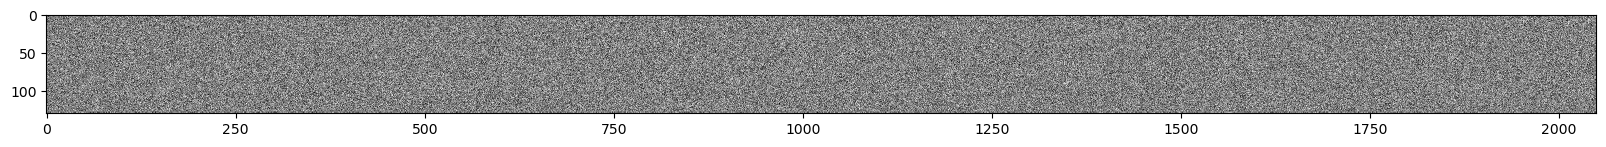

In [177]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][2], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [209]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0056_019_06.png',cv2.IMREAD_GRAYSCALE)
mask =  cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0056_019_06_mask.png',cv2.IMREAD_GRAYSCALE)
blur_img = cv2.GaussianBlur(img,(11,11),0)

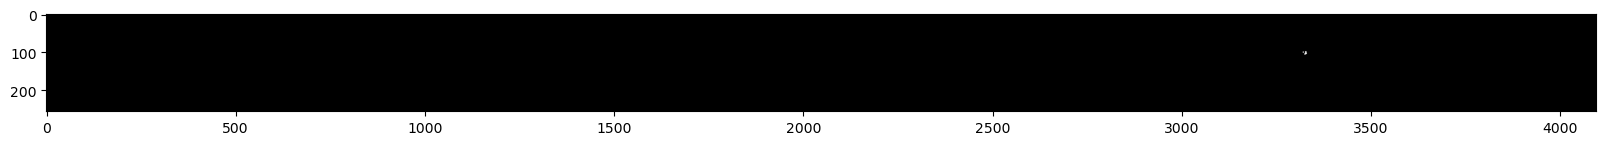

In [210]:
plt.figure(figsize=(20, 8))
plt.imshow(mask, cmap="gray")
plt.show()

In [211]:
h = pywt.wavedec2(blur_img, 'db3',  level=3)

In [212]:
len(h)

4

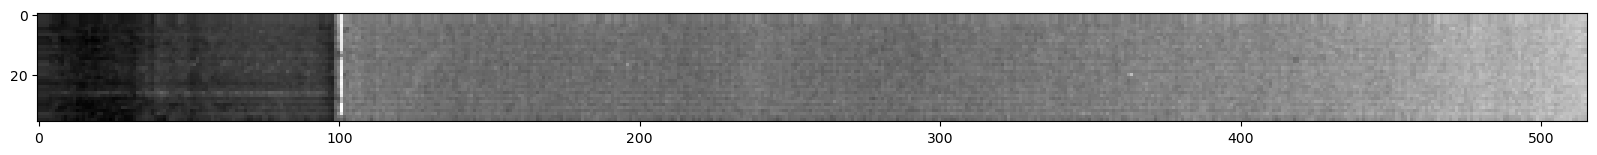

In [213]:
plt.figure(figsize=(20,8))
plt.imshow(h[0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

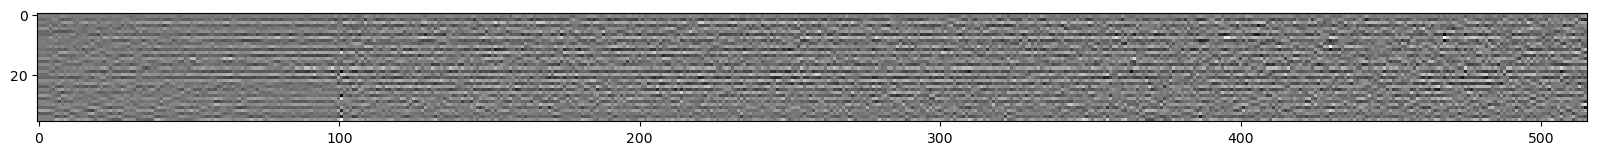

In [214]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

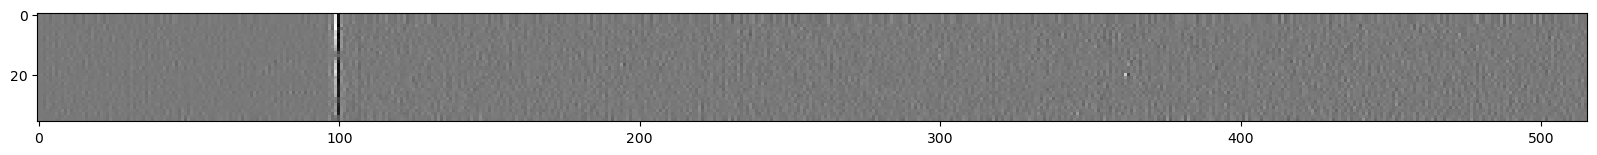

In [215]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][1], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

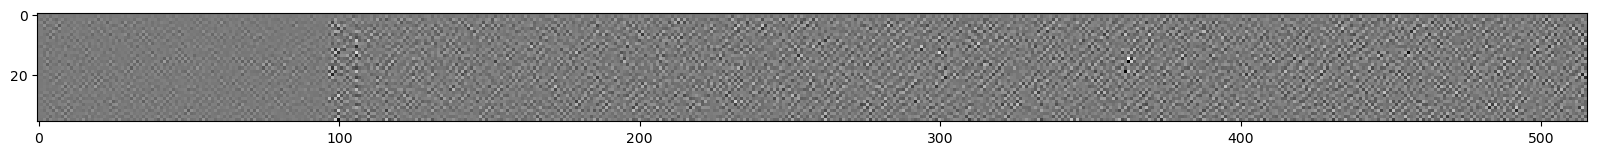

In [216]:
plt.figure(figsize=(20,8))
plt.imshow(h[1][2], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

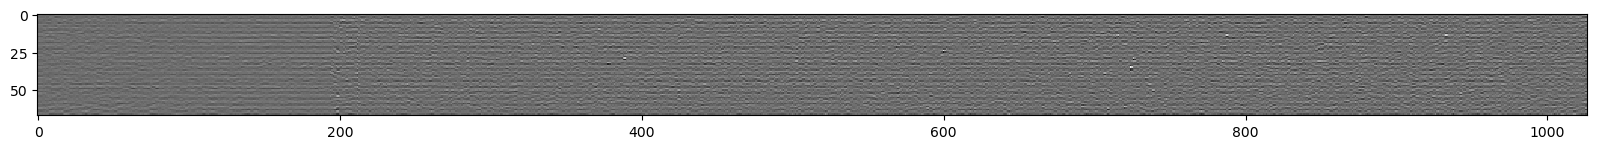

In [217]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

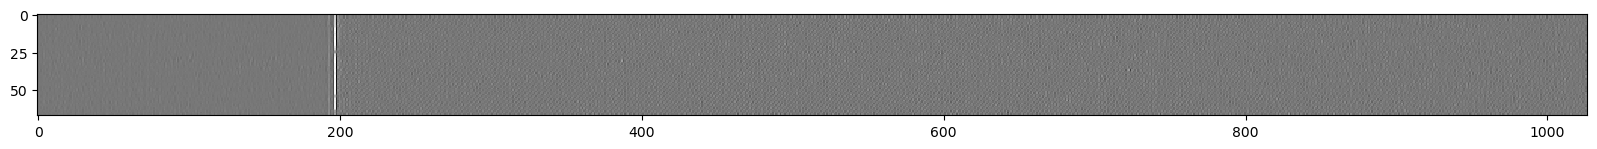

In [218]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][1], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

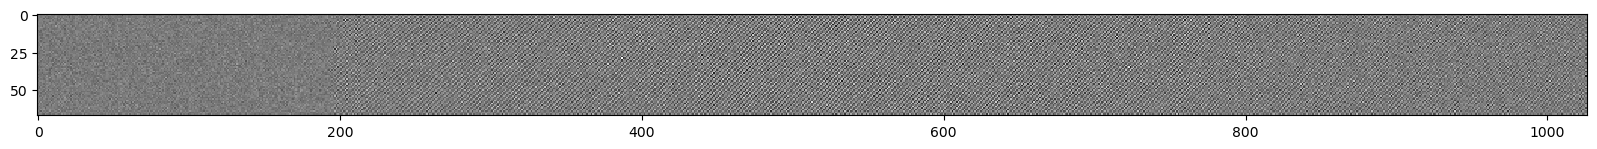

In [219]:
plt.figure(figsize=(20,8))
plt.imshow(h[2][2], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

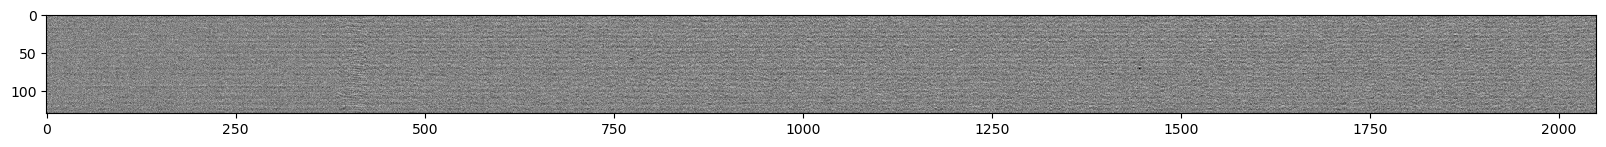

In [220]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][0], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

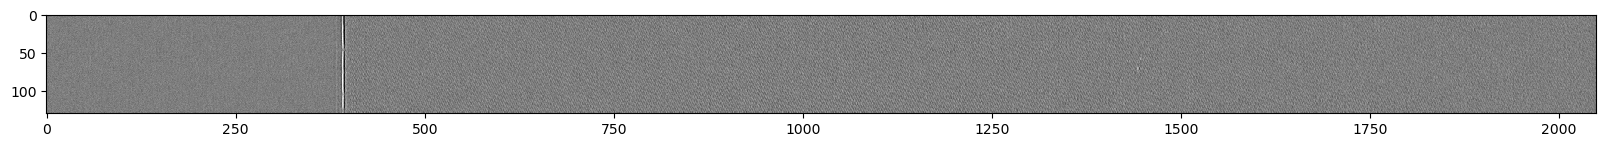

In [221]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][1], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

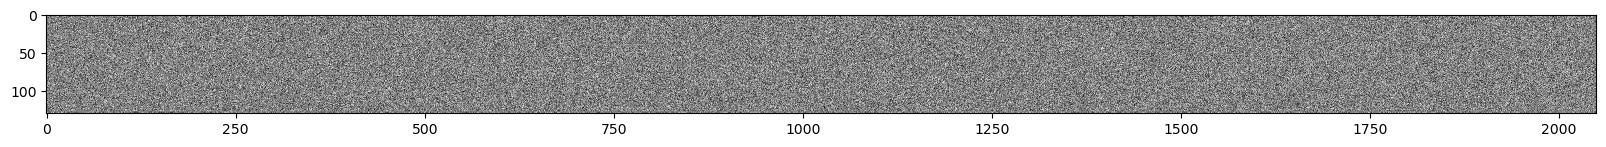

In [222]:
plt.figure(figsize=(20,8))
plt.imshow(h[3][2], interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [226]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0106_010_03.png')#,cv2.IMREAD_GRAYSCALE)
img_small = cv2.resize(img, (256,256))

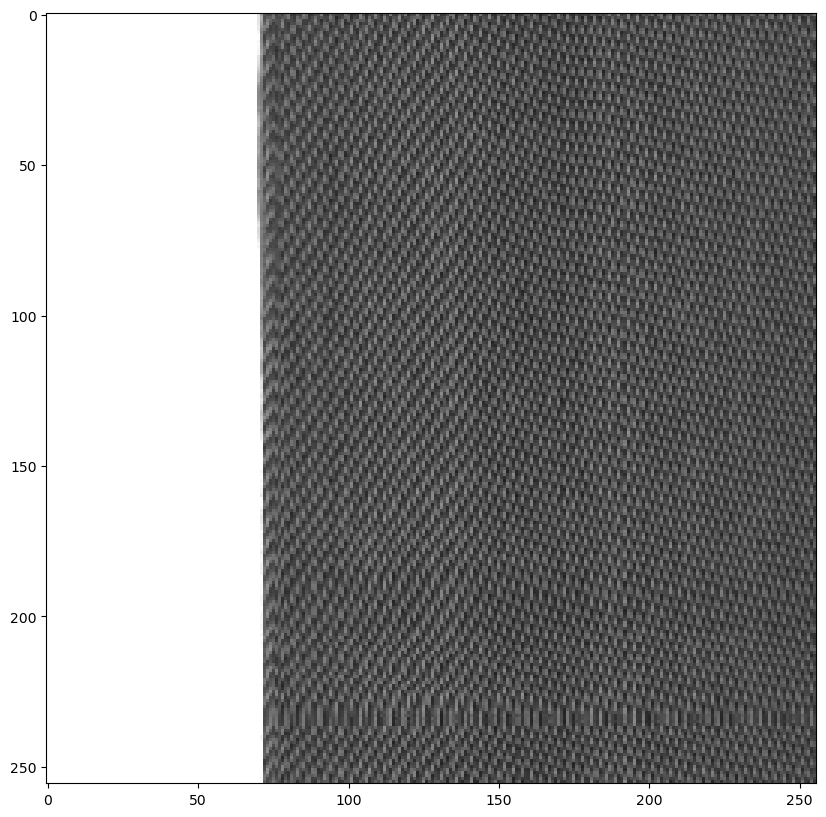

In [227]:
plt.figure(figsize=(10,10))
plt.imshow(img_small)
plt.show()

## Test PreProcessing

In [377]:
import numpy as np
import cv2
import pywt

def sliding_window(image, sq_size = 32, pix_steps=2):
    img_list = []
    for i in np.arange(0,image.shape[0]-sq_size+pix_steps,pix_steps):
        for j in np.arange(0,image.shape[1]-sq_size+pix_steps,pix_steps):
            img_list.append(image[i:i+sq_size,j:j+sq_size])
    return np.array(img_list)

img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0010_006_02.png',cv2.IMREAD_GRAYSCALE)
# mask =  cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0020_016_03_mask.png',cv2.IMREAD_GRAYSCALE)
blur_img = cv2.GaussianBlur(img,(11,11),0)

wavelets = pywt.wavedec2(blur_img, 'db3',  level=2)
out_arr = np.zeros((7,40,500))
out_arr[0,:,:] =cv2.resize(wavelets[0], (500,40))
for i in range(3):
    out_arr[i+1,:,:] = cv2.resize(wavelets[1][i], (500,40))
    out_arr[i+4,:,:] = cv2.resize(wavelets[2][i], (500,40))
# np.save("C:/Users/laure/Documents/proj_loopr/training_images/testing.npy",out_arr)


In [378]:
type(img)

numpy.ndarray

In [443]:
import os
source_dir = "C:/Users/laure/Documents/proj_loopr/processed_images"
sample_list = os.listdir(source_dir)


In [444]:
mask_dir = "C:/Users/laure/Documents/proj_loopr/all_masks"
mask_list = os.listdir(mask_dir)

In [445]:
for x in sample_list:
    if x[:-4]+"_mask.npy" not in mask_list:
        print("MIssing! "+str(x))

MIssing! 0100_025_08.npy


In [431]:
# mask_images_folder = os.path.join(source_folder, "Mask_images")
for file_name in mask_list:
    # source_path = os.path.join(mask_images_folder, file_name)
    # dest_path = os.path.join(out_folder, file_name[:-3]+"npy")
    if file_name[5:8] != "000" and file_name[5:8] != "00_":
        x = np.load(mask_dir+"/"+file_name)
        if np.amax(x)<1:
            print("Issue w "+file_name)
            x2 = cv2.imread("C:/Users/laure/Documents/proj_loopr/archive/Mask_images/"+file_name[:-4]+".png",cv2.IMREAD_GRAYSCALE)
            x3 = cv2.resize(x2,(2000,160),interpolation=cv2.INTER_LANCZOS4)
            if np.amax(cv2.resize(x3,(500,40), interpolation=cv2.INTER_LANCZOS4  ))>0:
            # if np.amax(x3)>0:
                print("fixed")



Issue w 0033_019_02_mask.npy
Issue w 0106_010_03_mask.npy


In [439]:
m1 = np.load(mask_dir+"/0044_019_04_mask.npy")
m2 = np.load(mask_dir+"/0044_019_04_mask2.npy")

In [442]:
np.save(mask_dir+"/0044_019_04_mask1.npy",m1+m2)

In [421]:
x = cv2.imread("C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0024_019_02_mask.png",cv2.IMREAD_GRAYSCALE)


In [422]:
np.amax(cv2.resize(x,(500,40), interpolation=cv2.INTER_LANCZOS4  ))

0

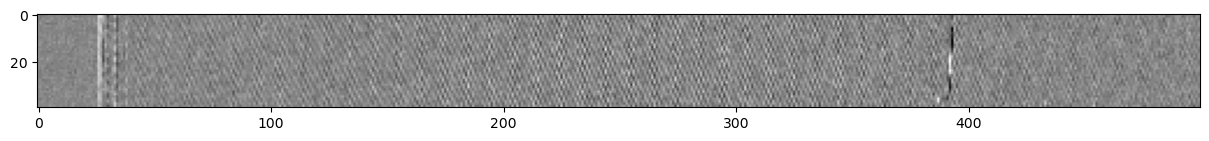

In [375]:
plt.figure(figsize=(15,10))
plt.imshow(out_arr[5,:,:],cmap="gray")

In [353]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.resize(np.array(list(wavelets[2])), (1027,67)),cmap="gray")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


<Figure size 1500x1000 with 0 Axes>

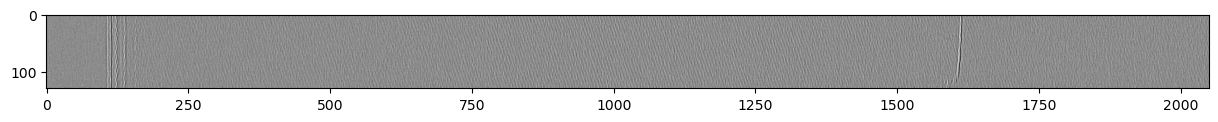

In [350]:
plt.figure(figsize=(15,10))
plt.imshow(wavelets[2][1],cmap="gray")


In [356]:
cv2.resize(wavelets[2][1], (1027,67)).shape

(67, 1027)

In [357]:
wavelets[1][1].shape

(67, 1027)